## LAB-6 : TEXT CORPUS CREATION AND BINARY CLASSIFICATION USING DNN

### Step-1:Dataset creation

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("friendvsenemy.csv")

In [3]:
df.head()

,Quotes,Target
0,Don�t make friends who are comfortable to be w...,1
1,The most beautiful discovery true friends make...,1
2,"Each friend represents a world in us, a world ...",1
3,"They may forget what you said, but they will n...",1
4,A real friend is one who walks in when the res...,1


In [4]:
df.shape

(25, 2)

### Step2: Pre-processing

In [5]:
import nltk
from nltk.corpus import stopwords,words

In [6]:
stop = stopwords.words('english')

In [7]:
df.columns = ['Quotes','target']

In [8]:
df['Quotes'] = df['Quotes'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop))

In [9]:
df.head()

,Quotes,target
0,Don�t make friends comfortable with. Make frie...,1
1,The beautiful discovery true friends make grow...,1
2,"Each friend represents world us, world possibl...",1
3,"They may forget said, never forget made feel",1
4,A real friend one walks rest world walks,1


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import warnings 
warnings.filterwarnings('ignore')

In [11]:
countvectorizer = CountVectorizer(analyzer= 'word', stop_words='english')
tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')

count_wm = countvectorizer.fit_transform(df['Quotes'])
tfidf_wm = tfidfvectorizer.fit_transform(df['Quotes'])

count_tokens = countvectorizer.get_feature_names()
tfidf_tokens = tfidfvectorizer.get_feature_names()
df_countvect = pd.DataFrame(data = count_wm.toarray(),index = ['d1','d2','d3','d4','d5','d6','d7','d8','d9','d10','d11','d12','d13','d14','d15','d16','d16','d17','d18','d19','d20','d21','d22','d23','d24'],columns = count_tokens)
df_tfidfvect = pd.DataFrame(data = tfidf_wm.toarray(),index = ['d1','d2','d3','d4','d5','d6','d7','d8','d9','d10','d11','d12','d13','d14','d15','d16','d16','d17','d18','d19','d20','d21','d22','d23','d24'],columns = tfidf_tokens)
print("Count Vectorizer\n")
print(df_countvect)
print("\nTD-IDF Vectorizer\n")
print(df_tfidfvect)

Count Vectorizer

     afraid  anybody  apart  arrive  art  away  awful  beautiful  befriended  \
d1        0        0      0       0    0     0      0          0           0   
d2        0        0      1       0    0     0      0          1           0   
d3        0        0      0       1    0     0      0          0           0   
d4        0        0      0       0    0     0      0          0           0   
d5        0        0      0       0    0     0      0          0           0   
d6        0        0      0       0    0     1      0          0           0   
d7        0        0      0       0    0     0      0          0           0   
d8        0        0      0       0    0     0      0          0           0   
d9        0        0      0       0    0     0      0          0           0   
d10       0        1      0       0    0     0      0          0           0   
d11       0        0      0       0    0     0      0          0           0   
d12       0        0  

### Step3: Dataset Preparation

In [12]:
from sklearn.datasets import make_classification
X, y = make_classification(n_features=2, n_redundant=0, 
                           n_informative=2, random_state=1, 
                           n_clusters_per_class=1)

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20)

### Step-4: Model Creation

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [15]:
def layerandnodes(n,l):
    model = Sequential()
    for x in range(l):
        model.add(Dense(n,activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='mean_squared_error',optimizer='RMSprop',metrics='accuracy')
    return model
model = layerandnodes(32,1)

In [16]:
 model.fit(X_train,y_train,epochs=100)

Epoch 1/100
3/3 [==============================] - 1s 11ms/step - loss: 0.2266 - accuracy: 0.7625
Epoch 2/100
3/3 [==============================] - 0s 8ms/step - loss: 0.2126 - accuracy: 0.8250
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 0.2034 - accuracy: 0.8500
Epoch 4/100
3/3 [==============================] - 0s 8ms/step - loss: 0.1955 - accuracy: 0.9000
Epoch 5/100
3/3 [==============================] - 0s 8ms/step - loss: 0.1885 - accuracy: 0.9125
Epoch 6/100
3/3 [==============================] - 0s 8ms/step - loss: 0.1822 - accuracy: 0.9125
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 0.1761 - accuracy: 0.9125
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 0.1705 - accuracy: 0.9250
Epoch 9/100
3/3 [==============================] - 0s 8ms/step - loss: 0.1650 - accuracy: 0.9250
Epoch 10/100
3/3 [==============================] - 0s 8ms/step - loss: 0.1596 - accuracy: 0.9375
Epoch 11/100
3/3 [==========

In [17]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 278ms/step - loss: 0.0023 - accuracy: 1.0000


[0.002313022967427969, 1.0]

### Step5:Analysis Part-A

### 8nodes

In [18]:
model1 = layerandnodes(8,1)
model1.fit(X_train,y_train)

3/3 [==============================] - 1s 11ms/step - loss: 0.2201 - accuracy: 0.5500


In [19]:
model1.evaluate(X_test,y_test)

1/1 [==============================] - 0s 220ms/step - loss: 0.2646 - accuracy: 0.3500


[0.26460209488868713, 0.3499999940395355]

### 16nodes

In [20]:
model2 = layerandnodes(16,1)
model2.fit(X_train,y_train)

3/3 [==============================] - 1s 6ms/step - loss: 0.2512 - accuracy: 0.4500


In [21]:
model2.evaluate(X_test,y_test)

1/1 [==============================] - 0s 197ms/step - loss: 0.2151 - accuracy: 0.7000


[0.21508049964904785, 0.699999988079071]

### 64nodes

In [22]:
model3 = layerandnodes(64,1)
model3.fit(X_train,y_train)

3/3 [==============================] - 1s 7ms/step - loss: 0.2427 - accuracy: 0.7125


In [23]:
model3.evaluate(X_test,y_test)

1/1 [==============================] - 0s 189ms/step - loss: 0.2344 - accuracy: 0.8500


[0.23435184359550476, 0.8500000238418579]

### 128nodes

In [24]:
model4 = layerandnodes(128,1)
model4.fit(X_train,y_train)

3/3 [==============================] - 1s 4ms/step - loss: 0.2442 - accuracy: 0.6875


In [25]:
model4.evaluate(X_test,y_test)

1/1 [==============================] - 0s 187ms/step - loss: 0.2285 - accuracy: 0.8500


[0.22851285338401794, 0.8500000238418579]

### 256nodes

In [26]:
model5 = layerandnodes(256,1)
model5.fit(X_train,y_train)

3/3 [==============================] - 1s 4ms/step - loss: 0.2443 - accuracy: 0.6250


In [27]:
model5.evaluate(X_test,y_test)

1/1 [==============================] - 0s 220ms/step - loss: 0.2039 - accuracy: 1.0000


[0.20392346382141113, 1.0]

### 512nodes

In [28]:
model6 = layerandnodes(512,1)
model6.fit(X_train,y_train,validation_split=0.20)

2/2 [==============================] - 1s 279ms/step - loss: 0.2296 - accuracy: 0.7812 - val_loss: 0.1946 - val_accuracy: 1.0000


In [29]:
model6.evaluate(X_test,y_test)

1/1 [==============================] - 0s 32ms/step - loss: 0.1963 - accuracy: 1.0000


[0.19627834856510162, 1.0]

### 1028nodes

In [30]:
model7 = layerandnodes(1028,1)
model7.fit(X_train,y_train,validation_split=0.20)

2/2 [==============================] - 1s 327ms/step - loss: 0.2399 - accuracy: 0.4844 - val_loss: 0.1911 - val_accuracy: 1.0000


In [31]:
model7.evaluate(X_test,y_test)

1/1 [==============================] - 0s 48ms/step - loss: 0.1944 - accuracy: 1.0000


[0.19436851143836975, 1.0]

In [32]:
model7.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 1028)              3084      
                                                                 
 dense_15 (Dense)            (None, 1)                 1029      
                                                                 
Total params: 4,113
Trainable params: 4,113
Non-trainable params: 0
_________________________________________________________________


In [33]:
model8 = layerandnodes(32,1)
model8.fit(X_train,y_train)

3/3 [==============================] - 1s 5ms/step - loss: 0.2868 - accuracy: 0.3875


In [34]:
model8.evaluate(X_test,y_test)

1/1 [==============================] - 0s 203ms/step - loss: 0.2566 - accuracy: 0.7000


[0.2566222548484802, 0.699999988079071]

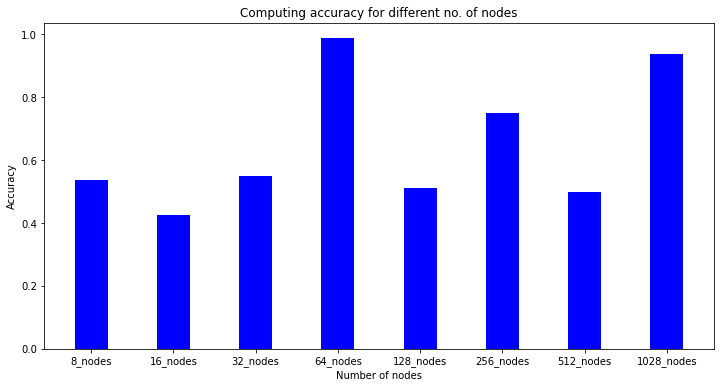

In [35]:
import matplotlib.pyplot as plt
# creating the barchart
bar={'8_nodes':0.5375,'16_nodes':0.4250,'32_nodes':0.5500,'64_nodes':0.9875,'128_nodes':0.5125,'256_nodes':0.7500,'512_nodes':0.5000,'1028_nodes':0.9375}
nodes = list(bar.keys())
acc = list(bar.values())

fig = plt.figure(figsize = (12, 6))

# creating the bar plot
plt.bar(nodes, acc, color ='blue',width = 0.4)

plt.xlabel("Number of nodes")
plt.ylabel("Accuracy")
plt.title("Computing accuracy for different no. of nodes")
plt.show()

## Accuracy for different kinds of nodes

In [36]:
bar

{'8_nodes': 0.5375,
 '16_nodes': 0.425,
 '32_nodes': 0.55,
 '64_nodes': 0.9875,
 '128_nodes': 0.5125,
 '256_nodes': 0.75,
 '512_nodes': 0.5,
 '1028_nodes': 0.9375}

### Step-5 Analysis part-b

In [37]:
model9 = layerandnodes(64,2)
model9.fit(X_train,y_train)

3/3 [==============================] - 1s 4ms/step - loss: 0.2187 - accuracy: 0.9625


In [46]:
model9.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 64)                192       
                                                                 
 dense_19 (Dense)            (None, 64)                4160      
                                                                 
 dense_20 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,417
Trainable params: 4,417
Non-trainable params: 0
_________________________________________________________________


In [38]:
model10 = layerandnodes(64,3)
model10.fit(X_train,y_train)

3/3 [==============================] - 1s 5ms/step - loss: 0.2349 - accuracy: 0.4500


In [47]:
model10.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 64)                192       
                                                                 
 dense_22 (Dense)            (None, 64)                4160      
                                                                 
 dense_23 (Dense)            (None, 64)                4160      
                                                                 
 dense_24 (Dense)            (None, 1)                 65        
                                                                 
Total params: 8,577
Trainable params: 8,577
Non-trainable params: 0
_________________________________________________________________


In [39]:
model11 = layerandnodes(64,4)
model11.fit(X_train,y_train)

3/3 [==============================] - 1s 6ms/step - loss: 0.2230 - accuracy: 0.9375


In [48]:
model11.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 64)                192       
                                                                 
 dense_26 (Dense)            (None, 64)                4160      
                                                                 
 dense_27 (Dense)            (None, 64)                4160      
                                                                 
 dense_28 (Dense)            (None, 64)                4160      
                                                                 
 dense_29 (Dense)            (None, 1)                 65        
                                                                 
Total params: 12,737
Trainable params: 12,737
Non-trainable params: 0
_________________________________________________________________


In [40]:
model12 = layerandnodes(64,5)
model12.fit(X_train,y_train)

3/3 [==============================] - 2s 6ms/step - loss: 0.2422 - accuracy: 0.6500


In [41]:
model12.evaluate(X_test,y_test)

1/1 [==============================] - 0s 238ms/step - loss: 0.2140 - accuracy: 1.0000


[0.21404823660850525, 1.0]

In [45]:
model12.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 64)                192       
                                                                 
 dense_31 (Dense)            (None, 64)                4160      
                                                                 
 dense_32 (Dense)            (None, 64)                4160      
                                                                 
 dense_33 (Dense)            (None, 64)                4160      
                                                                 
 dense_34 (Dense)            (None, 64)                4160      
                                                                 
 dense_35 (Dense)            (None, 1)                 65        
                                                                 
Total params: 16,897
Trainable params: 16,897
Non-tra

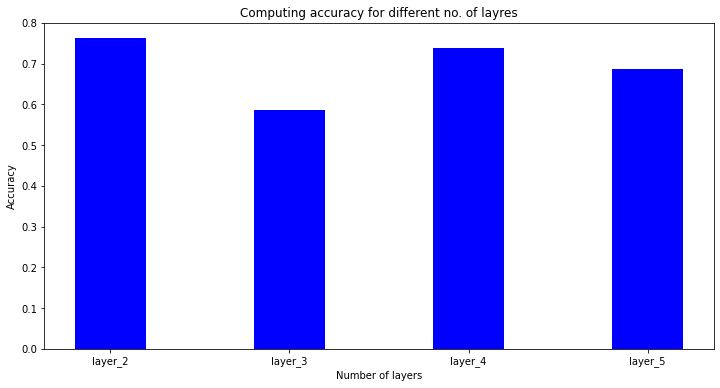

In [42]:
layers={'layer_2':0.7625,'layer_3':0.5875,'layer_4':0.7375,'layer_5':0.6875}
nodes = list(layers.keys())
acc = list(layers.values())

fig = plt.figure(figsize = (12, 6))

plt.bar(nodes, acc, color ='blue',width = 0.4)

plt.xlabel("Number of layers")
plt.ylabel("Accuracy")
plt.title("Computing accuracy for different no. of layres")
plt.show()

## Accuracy for different types of layers

In [43]:
layers

{'layer_2': 0.7625, 'layer_3': 0.5875, 'layer_4': 0.7375, 'layer_5': 0.6875}